In [6]:
import numpy as np
import pandas as pd
import keras

df = pd.read_csv("display.csv", sep=';', encoding='utf-8')

In [7]:
display_clusters = df[['Id', 'Кластер', 'RFMClass']].set_index('Id')

In [8]:
best_class = {'colsample_bytree': 0.59, 'gamma': 0.09, 'learning_rate': 0.32, 'max_depth': 22, 'min_child_weight': 1.0, 'n_estimators': 9, 'subsample': 0.92}
best_reg = {'colsample_bytree': 0.12, 'gamma': 0.01, 'learning_rate': 0.09, 'max_depth': 23, 'min_child_weight': 2.0, 'subsample': 0.98}

In [9]:
display_model = pd.read_csv("display_model.csv", sep=';', encoding='utf-8').drop_duplicates('Id').drop(columns = ['Unnamed: 0'])
display_reg = pd.read_csv("display_reg.csv", sep=';', encoding='utf-8').drop_duplicates('Id').drop(columns = ['Unnamed: 0'])

In [10]:
df.iloc[:, 1: 14].set_index('Id')

,КоличествоЧеков,СреднийЧек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,СредняяМаржа,КоличествоЧековВыкупленные,СреднийЧекВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,ВыручкаВыкупленная,КоличествоТоваровВыкупленные,СредняяМаржаВыкупленная
Id,,,,,,,,,,,,
55574948-52495050484877,1,1634.0,1.000,1585.0,13,38.249231,1.0,1585.0,1.000000,1585.0,13,38.249231
55575656-49565651494970,1,1915.0,1.000,1816.0,11,-0.941818,1.0,1816.0,1.000000,1816.0,11,-0.941818
55575155-54535648525672,4,15147.0,1.000,85842.0,11,2365.939091,3.0,17498.0,0.545455,52494.0,6,2675.405000
55575456-55545450525776,2,2782.0,1.125,5264.0,9,192.295000,2.0,2632.0,1.125000,5264.0,9,192.295000
55575054-54575350505479,3,599.0,1.000,1650.0,5,76.240000,1.0,310.0,0.200000,310.0,1,71.550000
...,...,...,...,...,...,...,...,...,...,...,...,...
55575653-57494949515079,1,2729.0,4.000,2680.0,4,188.000000,1.0,2680.0,4.000000,2680.0,4,188.000000
55574954-54505154565072,1,4423.0,1.000,4273.0,7,187.442857,1.0,4273.0,1.000000,4273.0,7,187.442857
55574853-55504849545076,1,5608.0,1.000,4089.0,3,508.210000,1.0,4089.0,1.000000,4089.0,3,508.210000


In [11]:
x = display_model.drop(columns = ['Id', 'Гео', 'Цель']).values
y = display_model.Цель

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x = preprocessing.StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(**best_class)
xgb = xgb.fit(x_train,y_train)
y_class = xgb.predict_proba(x)
y_class = [row[1] for row in y_class]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:51:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
x = display_reg.drop(columns = ['Id', 'Гео', 'Цель']).values
y = display_reg.Цель

In [15]:
x = preprocessing.StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
from xgboost import XGBRegressor

xgb = XGBRegressor(**best_reg)
xgb = xgb.fit(x_train,y_train)
y_reg = xgb.predict(x)

In [17]:
res = pd.DataFrame(display_model['Id'])
res = res.merge(display_clusters, left_on = 'Id', right_index = True, how = 'left')
res['RFMClass'] = res['RFMClass'].apply(lambda x: sum(int(digit) for digit in str(x)))
res['proba'] = y_class
res['value'] = y_reg
res['expectancy'] = y_class * y_reg
res = res.reset_index().drop(columns = 'index')

In [18]:
res

,Id,Кластер,RFMClass,proba,value,expectancy
0,55574948-52495050484877,3,8,0.112954,506.728088,57.236958
1,55575656-49565651494970,3,9,0.122086,76.752373,9.370367
2,55575155-54535648525672,5,9,0.090942,34.183224,3.108686
3,55575456-55545450525776,3,9,0.148231,488.635376,72.430977
4,55575054-54575350505479,3,9,0.163384,17.708185,2.893241
...,...,...,...,...,...,...
123872,55574954-52495355555471,3,8,0.285017,608.175415,173.340393
123873,55575649-57495654575771,1,5,0.145945,114.204590,16.667587
123874,55575048-54515157545679,3,6,0.076728,80.622726,6.186044
123875,55575054-56575557485677,3,9,0.464519,208.364578,96.789322


In [19]:
basket = pd.read_csv("mba_clients.csv", sep=';', encoding='utf-8')

In [20]:
basket

,Id,ОДЕЖДА,ППКП,КГТ,ИНОЕ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ИГРУШКИ,...,ЧАСЫ/ОЧКИ,БИЖУТЕРИЯ,СВЕТООТРАЖАЮЩИЕ ЭЛЕМЕНТЫ,ВЕТАПТЕКА,ВИТАМИНЫ/БАДЫ,ТОВАРЫ ДЛЯ ЧЕРЕПАХ И РЕПТИЛИЙ,ТОВАРЫ ДЛЯ ХОРЬКОВ,ЗЕРКАЛА,"ГЛАДИЛЬНЫЕ ДОСКИ,СУШИЛКИ",ТЕХНИКА ДЛЯ ДОМА
0,55574948-52495050484877,11.0,1.0,1.0,0.0,11.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55575656-49565651494970,11.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55575155-54535648525672,1.0,1.0,3.0,0.0,1.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55575456-55545450525776,6.0,3.0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55575054-54575350505479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151037,55575653-57494949515079,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151038,55574954-54505154565072,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151039,55574853-55504849545076,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151040,55574954-54495048525272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
rules = {'Cluster': [1, 2, 3, 4, 5],
        'Категория': ['КОСМЕТИКА/ГИГИЕНА', 'ОДЕЖДА', 'ТЕКСТИЛЬ, ТРИКОТАЖ', 'КОСМЕТИКА/ГИГИЕНА', 'ПОСТЕЛЬНОЕ БЕЛЬЕ'],
         'Маржа' : [38.63, 287.96, 281.70, 38.63, 261.15],
         'СредняяСтоимость' : [250.44, 917.66, 868.67, 250.44, 748.41],
         'МаржаПроцентная' : [0.15, 0.314, 0.324, 0.1542, 0.349]
        }
rules_df = pd.DataFrame(rules, columns = ['Cluster', 'Категория', 'Маржа', 'СредняяСтоимость', 'МаржаПроцентная']).set_index('Cluster')

In [22]:
rules_df

,Категория,Маржа,СредняяСтоимость,МаржаПроцентная
Cluster,,,,
1,КОСМЕТИКА/ГИГИЕНА,38.63,250.44,0.1500
2,ОДЕЖДА,287.96,917.66,0.3140
3,"ТЕКСТИЛЬ, ТРИКОТАЖ",281.70,868.67,0.3240
4,КОСМЕТИКА/ГИГИЕНА,38.63,250.44,0.1542
5,ПОСТЕЛЬНОЕ БЕЛЬЕ,261.15,748.41,0.3490


<AxesSubplot:xlabel='RFMClass'>

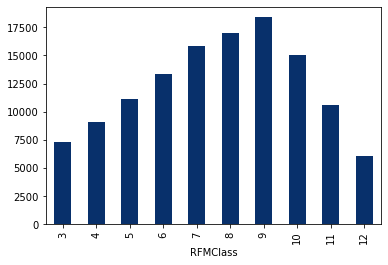

In [23]:
res.groupby('RFMClass').count()['Id'].plot(kind='bar', colormap='Blues_r')

In [24]:
res = res.merge(df.iloc[:, 1: 14].set_index('Id'), left_on = 'Id', right_index = True, how = 'left')

In [25]:
res = res.merge(rules_df, left_on = 'Кластер', right_index=True, how = 'left')

In [26]:
res 

,Id,Кластер,RFMClass,proba,value,expectancy,КоличествоЧеков,СреднийЧек,СреднееЧислоТоваровЧека,Выручка,...,КоличествоЧековВыкупленные,СреднийЧекВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,ВыручкаВыкупленная,КоличествоТоваровВыкупленные,СредняяМаржаВыкупленная,Категория,Маржа,СредняяСтоимость,МаржаПроцентная
0,55574948-52495050484877,3,8,0.112954,506.728088,57.236958,1,1634.0,1.000,1585.0,...,1.0,1585.0,1.000000,1585.0,13,38.249231,"ТЕКСТИЛЬ, ТРИКОТАЖ",281.70,868.67,0.3240
1,55575656-49565651494970,3,9,0.122086,76.752373,9.370367,1,1915.0,1.000,1816.0,...,1.0,1816.0,1.000000,1816.0,11,-0.941818,"ТЕКСТИЛЬ, ТРИКОТАЖ",281.70,868.67,0.3240
2,55575155-54535648525672,5,9,0.090942,34.183224,3.108686,4,15147.0,1.000,85842.0,...,3.0,17498.0,0.545455,52494.0,6,2675.405000,ПОСТЕЛЬНОЕ БЕЛЬЕ,261.15,748.41,0.3490
3,55575456-55545450525776,3,9,0.148231,488.635376,72.430977,2,2782.0,1.125,5264.0,...,2.0,2632.0,1.125000,5264.0,9,192.295000,"ТЕКСТИЛЬ, ТРИКОТАЖ",281.70,868.67,0.3240
4,55575054-54575350505479,3,9,0.163384,17.708185,2.893241,3,599.0,1.000,1650.0,...,1.0,310.0,0.200000,310.0,1,71.550000,"ТЕКСТИЛЬ, ТРИКОТАЖ",281.70,868.67,0.3240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123872,55574954-52495355555471,3,8,0.285017,608.175415,173.340393,1,6453.0,1.000,6453.0,...,1.0,1018.0,0.285714,1018.0,2,100.625000,"ТЕКСТИЛЬ, ТРИКОТАЖ",281.70,868.67,0.3240
123873,55575649-57495654575771,1,5,0.145945,114.204590,16.667587,1,578.0,1.000,479.0,...,1.0,479.0,1.000000,479.0,2,19.640000,КОСМЕТИКА/ГИГИЕНА,38.63,250.44,0.1500
123874,55575048-54515157545679,3,6,0.076728,80.622726,6.186044,1,1058.0,1.000,909.0,...,1.0,909.0,1.000000,909.0,1,435.070000,"ТЕКСТИЛЬ, ТРИКОТАЖ",281.70,868.67,0.3240
123875,55575054-56575557485677,3,9,0.464519,208.364578,96.789322,2,1803.5,1.000,3558.0,...,2.0,1779.0,1.000000,3558.0,2,330.240000,"ТЕКСТИЛЬ, ТРИКОТАЖ",281.70,868.67,0.3240


In [27]:
def foo(x):
    return x.replace('.', ',')

res_print = res.astype('string')
res_print = res_print.applymap(foo)
res_print.to_csv('abt_final.csv', encoding = 'cp1251', sep = ';')